# **--------------Netflix - Streaming Media Company--------------**

*   Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally.

**The company wants to know the type of shows/movies to produce and how they can grow the business in different countries:**
*   Analyze the data and generate insights that could help Netflix

**Variables considered in tracking TV shows/movies available on Netflix:**
*   **Show_id**: Unique ID for every Movie / Tv Show
*   **Type**: Identifier - A Movie or TV Show
*   **Title**: Title of the Movie / Tv Show
*   **Director**: Director of the Movie
*   **Cast**: Actors involved in the movie/show
*   **Country**: Country where the movie/show was produced
*   **Date_added**: Date it was added on Netflix
*   **Release_year**: Actual Release year of the movie/show
*   **Rating**: TV Rating of the movie/show
*   **Duration**: Total Duration - in minutes or number of seasons
*   **Listed_in**: Genre
*   **Description**: The summary description

*   **Importing necessary packages for EDA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")

*   **Importing/Reading the dataset for EDA**

In [ ]:
N=pd.read_csv('netflix.csv')
N.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
N['listed_in']=list(N['listed_in'].str.split(","))
N['country']=list(N['country'].str.split(","))
N['cast']=list(N['cast'].str.split(","))

In [ ]:
N.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...


*   **Shape of the dataset**

In [ ]:
N.shape

(8807, 12)

The dataset contains 8807 entries with 12 features.

*   **Characteristics of the dataset**

In [ ]:
N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Most of the Null values are present in director,cast,country features.

# **Data Cleaning**

*   **Placing values in their respective columns**

In [ ]:
N[N['rating']=='74 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,[Louis C.K.],[United States],"April 4, 2017",2017,74 min,NaN,[Movies],"Louis C.K. muses on religion, eternal love, gi..."


In [ ]:
N[N['rating']=='84 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,[Louis C.K.],[United States],"September 16, 2016",2010,84 min,NaN,[Movies],Emmy-winning comedy writer Louis C.K. brings h...


In [ ]:
N[N['rating']=='66 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,[Louis C.K.],[United States],"August 15, 2016",2015,66 min,NaN,[Movies],The comic puts his trademark hilarious/thought...


In [ ]:
N.loc[(N["rating"] == "74 min") | (N["rating"] == "84 min") | (N["rating"]== "66 min")]
N["duration"][[5541,5794,5813]] = N["rating"][[5541,5794,5813]]
N["rating"][[5541,5794,5813]]="Unknown Rating"

*   **Dropping features not useful for EDA**

In [ ]:
#N.drop(columns = ["show_id" , "description"] , axis=1, inplace = True)

In [ ]:
#N.head()

*   **Treating NULL values**

In [ ]:
N["director"] = N["director"].fillna("Unknown Director")
N["cast"] = N["cast"].fillna("Unknown Cast")
N["country"] = N["country"].fillna("Unknown Country")
N["rating"] = N["rating"].fillna("Unknown Rating")

In [ ]:
N=N.explode('cast',ignore_index=False)
N=N.explode('country',ignore_index=False)
N=N.explode('listed_in',ignore_index=False)

In [ ]:
N

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


*   **Coverting the date_added column to Pandas datetime**



In [ ]:
N.dropna(inplace=True)

In [ ]:
def year(x):
  return x.split(",")[-1]
def month(x):
  x=x.split(",")[0]
  return x.split(" ")[0]
def day(x):
  x=x.split(",")[0]
  return x.split(" ")[-1]

In [ ]:
N['date_added']=N['date_added'].apply(year)+'-'+N['date_added'].apply(month)+'-'+N['date_added'].apply(day)
N['date_added']=N['date_added'].apply(lambda x: x.strip())
N['date_added_len']=N['date_added'].apply(lambda x: len(x))
N.drop(N[N['date_added_len']<=8].index,inplace=True)
N['date_added']=pd.to_datetime(N['date_added'],format='%Y-%B-%d')
N['release_date']=pd.to_datetime(N['release_year'],format='%Y')
N.drop(columns=['date_added_len'],inplace=True)

In [ ]:
N['year_added']=N['date_added'].dt.year
N['month_added']=N['date_added'].dt.month
N['day_added']=N['date_added'].dt.day
N['day_Name']=N['date_added'].dt.day_name()
N['month_name']=N['date_added'].dt.month_name()

#    **Explorative Data Analysis**

**Categorical Variables**

In [ ]:
N['type'].value_counts()

,count
type,
Movie,131931
TV Show,52731


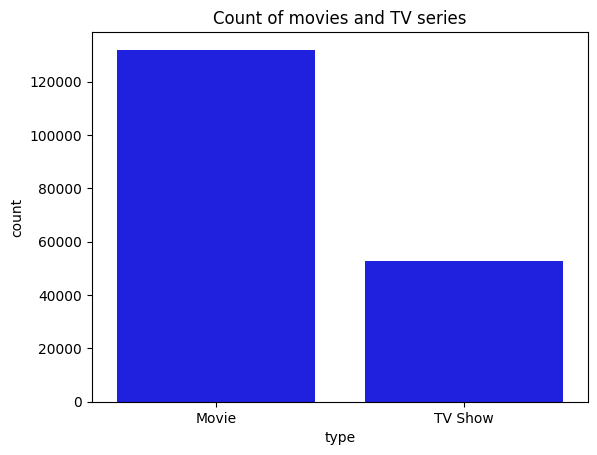

In [ ]:
#countplot to count the no of movies and tv shows available.
sns.countplot(x = "type" , data = N , color='blue')
plt.title("Count of movies and TV series")
plt.show()

*   There are 6131 Movies and 2578 TV Show's in Netflix.
*   Most of the streaming video present in Netflix are movies.

In [ ]:
N['rating'].value_counts()

,count
rating,
TV-MA,66921
TV-14,41577
R,23990
PG-13,15233
TV-PG,13532
PG,9011
TV-Y7,5736
TV-Y,3084
TV-G,2611


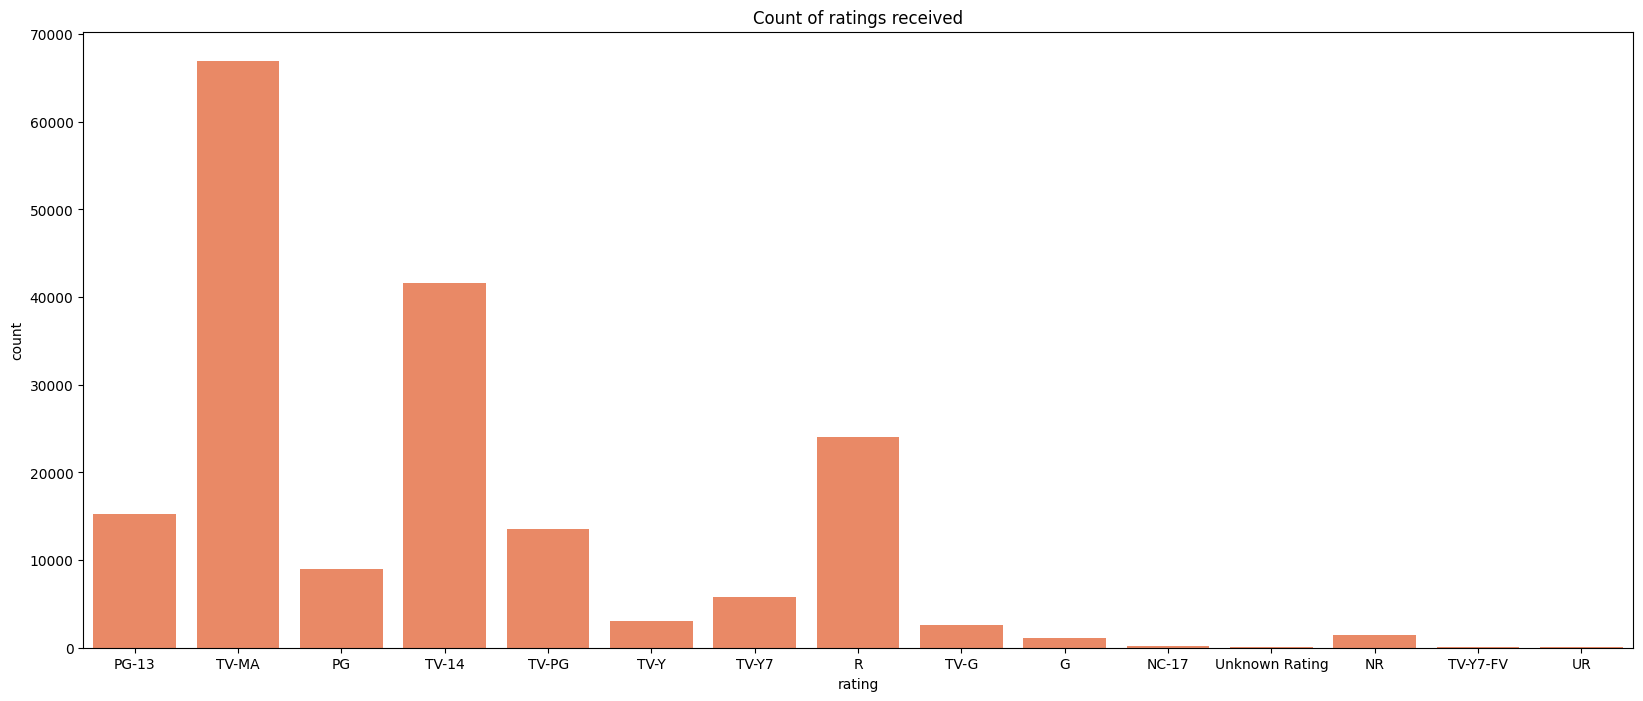

In [ ]:
#countplot to count the number of ratings received.
plt.figure(figsize=(20,8))
sns.countplot(x = "rating" , data = N , color='coral')
plt.title("Count of ratings received")
plt.show()

*   Most of the streaming video's present in netflix are "TV-MA" rated.
*   There are 3183 videos that are TV-MA rated.

**Types of genre that are mostly produced**

In [ ]:
N['listed_in'].value_counts().head(10)

,count
listed_in,
International Movies,25097
Dramas,18657
Comedies,12262
Action & Adventure,11124
Dramas,9142
Independent Movies,8577
TV Dramas,7288
Children & Family Movies,7267
International TV Shows,6465


*   Most video's content present in netflix are Dramas_International Movies,Documentaries,Stand-Up Comedy.

# **Comparision of TV Shows Vs Movies**

**Grouping data based on the 'type'**

In [ ]:
T=N[N['type']=="TV Show"]
M=N[N['type']=="Movie"]

**Top 10 countries that produced most number of Movies**

In [ ]:
M.groupby('country')['title'].nunique().sort_values(ascending=False).head(10)

,title
country,
United States,2364
India,927
Unknown Country,440
United States,388
United Kingdom,382
Canada,187
France,155
United Kingdom,152
France,148


*   United States is the country that produces most of the movies.
*   There are 2058 movies that are produced in United States.

**Top 10 countries that produced most number of TV Shows**

In [ ]:
T.groupby('country')['title'].nunique().sort_values(ascending=False).head(10)

,title
country,
United States,805
Unknown Country,387
United Kingdom,229
Japan,170
South Korea,159
United States,86
India,80
Canada,72
Taiwan,70


*   United States is the country that produces most of the TV Show's.
*   There are 720 TV Show's that are produced in United States.

**Best day to launch Movie**

In [ ]:
M['day_Name'].value_counts()

,count
day_Name,
Friday,32843
Thursday,23142
Wednesday,20577
Tuesday,15403
Sunday,14010
Monday,13198
Saturday,12758


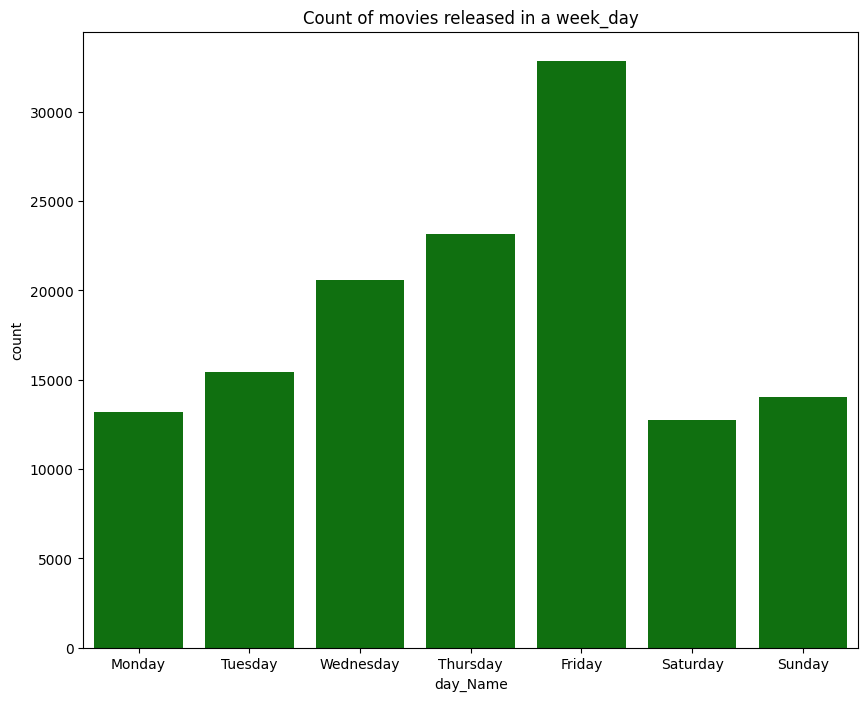

In [ ]:
#countplot to count the number of movies released on different day's in a week.
plt.figure(figsize=(10,8))
sns.countplot(x = "day_Name" , data = M , color='green',order=["Monday","Tuesday" , "Wednesday", "Thursday", "Friday", "Saturday" ,"Sunday"])
plt.title("Count of movies released in a week_day")
plt.show()

*   "Friday" is the best day to release a movie on Netflix.
*   There are 1566 movies that are released on friday in Netflix.

**Best month to launch Movie**

In [ ]:
M['month_name'].value_counts()

,count
month_name,
July,12939
January,12689
September,11971
October,11941
December,11576
April,11058
August,11048
March,10904
June,10567


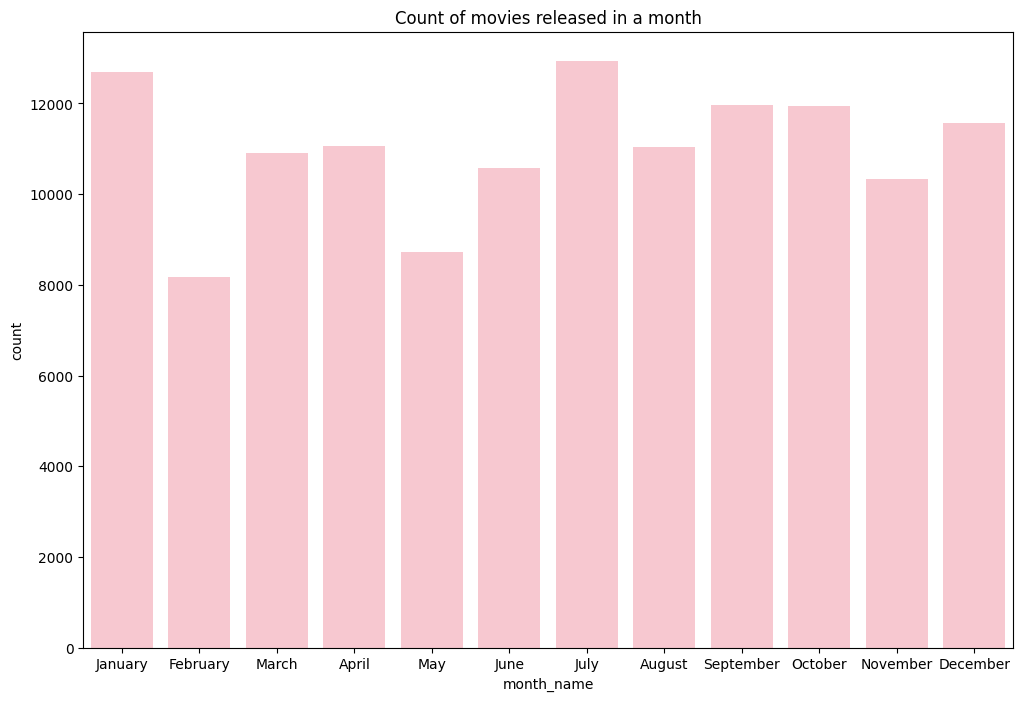

In [ ]:
#countplot to count the number of movies released in a month.
plt.figure(figsize=(12,8))
sns.countplot(x = "month_name" , data = M , color='pink',order=["January","February","March","April","May","June","July","August","September","October","November","December"])
plt.title("Count of movies released in a month")
plt.show()

*   Every month is best to release a movie on Netflix except "February".
*   Almost every month has approximately 500 movies realesed on Netflix.

**Best day to launch TV Show**

In [ ]:
T['day_Name'].value_counts()

,count
day_Name,
Friday,19886
Thursday,7910
Tuesday,6295
Wednesday,6204
Saturday,5246
Monday,4069
Sunday,3121


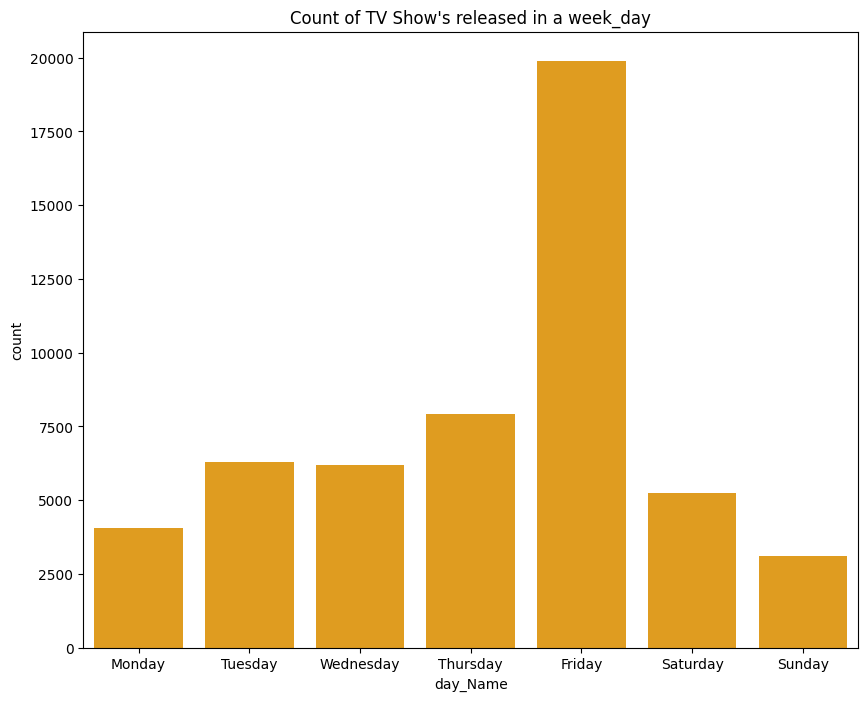

In [ ]:
#countplot to count the number of TV Show's released on different day's in a week.
plt.figure(figsize=(10,8))
sns.countplot(x = "day_Name" , data = T , color='orange',order=["Monday","Tuesday" , "Wednesday", "Thursday", "Friday", "Saturday" ,"Sunday"])
plt.title("Count of TV Show's released in a week_day")
plt.show()

*   "Friday" is the best day to release a TV Show in Netflix.
*   There are 910 TV Show that are released on friday in Netflix.

**Best month to launch TV Show**

In [ ]:
T['month_name'].value_counts()

,count
month_name,
December,5200
July,4991
September,4773
June,4762
August,4676
November,4427
April,4332
March,4173
October,4164


*   Every month is best to release a TV Show on Netflix except "February".
*   Almost every month has approximately 200 movies realesed on Netflix.

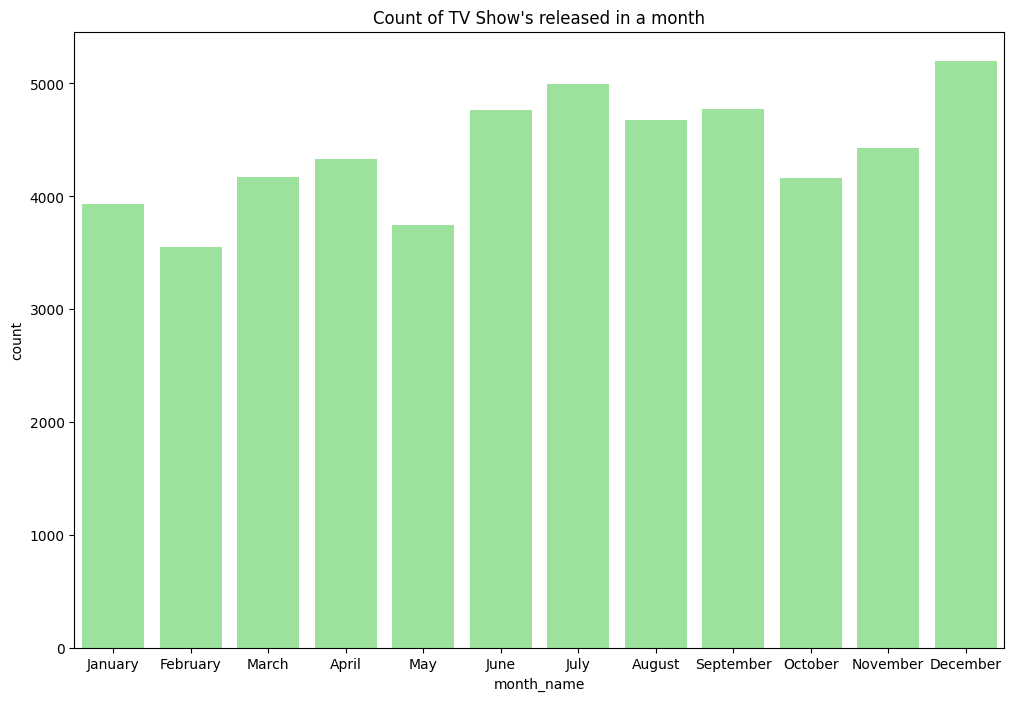

In [ ]:
#countplot to count the number of TV Show's released in a month.
plt.figure(figsize=(12,8))
sns.countplot(x = "month_name" , data = T , color='lightgreen',order=["January","February","March","April","May","June","July","August","September","October","November","December"])
plt.title("Count of TV Show's released in a month")
plt.show()

**Top 10 director's who directed most movies**

In [ ]:
M['director'].value_counts().head(10)

,count
director,
Unknown Director,1285
Martin Scorsese,419
Youssef Chahine,409
Cathy Garcia-Molina,356
Steven Spielberg,355
Lars von Trier,336
Raja Gosnell,308
Tom Hooper,306
McG,293


**Top 10 director's who directed most TV Show's**

In [ ]:
T['director'].value_counts().head(10)

,count
director,
Unknown Director,47687
Noam Murro,189
Thomas Astruc,160
"Damien Chazelle, Houda Benyamina, Laïla Marrakchi, Alan Poul",104
Rob Seidenglanz,103
Alejandro Lozano,90
Jay Oliva,81
Manolo Caro,78
Kongkiat Komesiri,75


**Top 10 actor's who acted in most movies**

In [ ]:
M_actors=[]
for i in M['cast']:
  if i=='Unknown Cast':
    pass
  else:
    M_actors.extend(i.split(","))

In [ ]:
M_actors=pd.Series(M_actors)
M_actors.value_counts().head(10)

,count
Anupam Kher,107
Boman Irani,80
Om Puri,78
Shah Rukh Khan,77
Paresh Rawal,76
Akshay Kumar,70
Naseeruddin Shah,63
Jim Broadbent,62
Ben Whishaw,62
Willem Dafoe,59


**Top 10 actor's who acted in most TV Show's**

In [ ]:
T_actors=[]
for i in T['cast']:
  if i=='Unknown Cast':
    pass
  else:
    T_actors.extend(i.split(","))

In [ ]:
T_actors=pd.Series(T_actors)
T_actors.value_counts().head(10)

,count
David Attenborough,82
Takahiro Sakurai,51
Ai Kayano,41
Yuki Kaji,40
Junichi Suwabe,38
Kate Harbour,35
Justin Fletcher,35
Richard Webber,33
John Sparkes,33
Daisuke Ono,31


**Average Time taken by a Movie added to Netflix after releasing**

In [ ]:
abs(M['date_added']-M['release_date']).mean()

Timedelta('2725 days 18:26:54.134661248')

*   On average it takes 2273 days for a movie to get added to Netflix after releasing.

**Average Time taken by a TV Show added to Netflix after releasing**

In [ ]:
abs(T['date_added']-T['release_date']).mean()

Timedelta('958 days 00:37:26.390168976')

*   On average it takes 1001 days for a TV Show to get added to Netflix after releasing.

**Number of movies released per year for the last 20-30 years**

In [ ]:
M['release_year'].value_counts().sort_index(ascending=False).head(30)

,count
release_year,
2021,4830
2020,8807
2019,10985
2018,15277
2017,13587
2016,12798
2015,9290
2014,6485
2013,5802


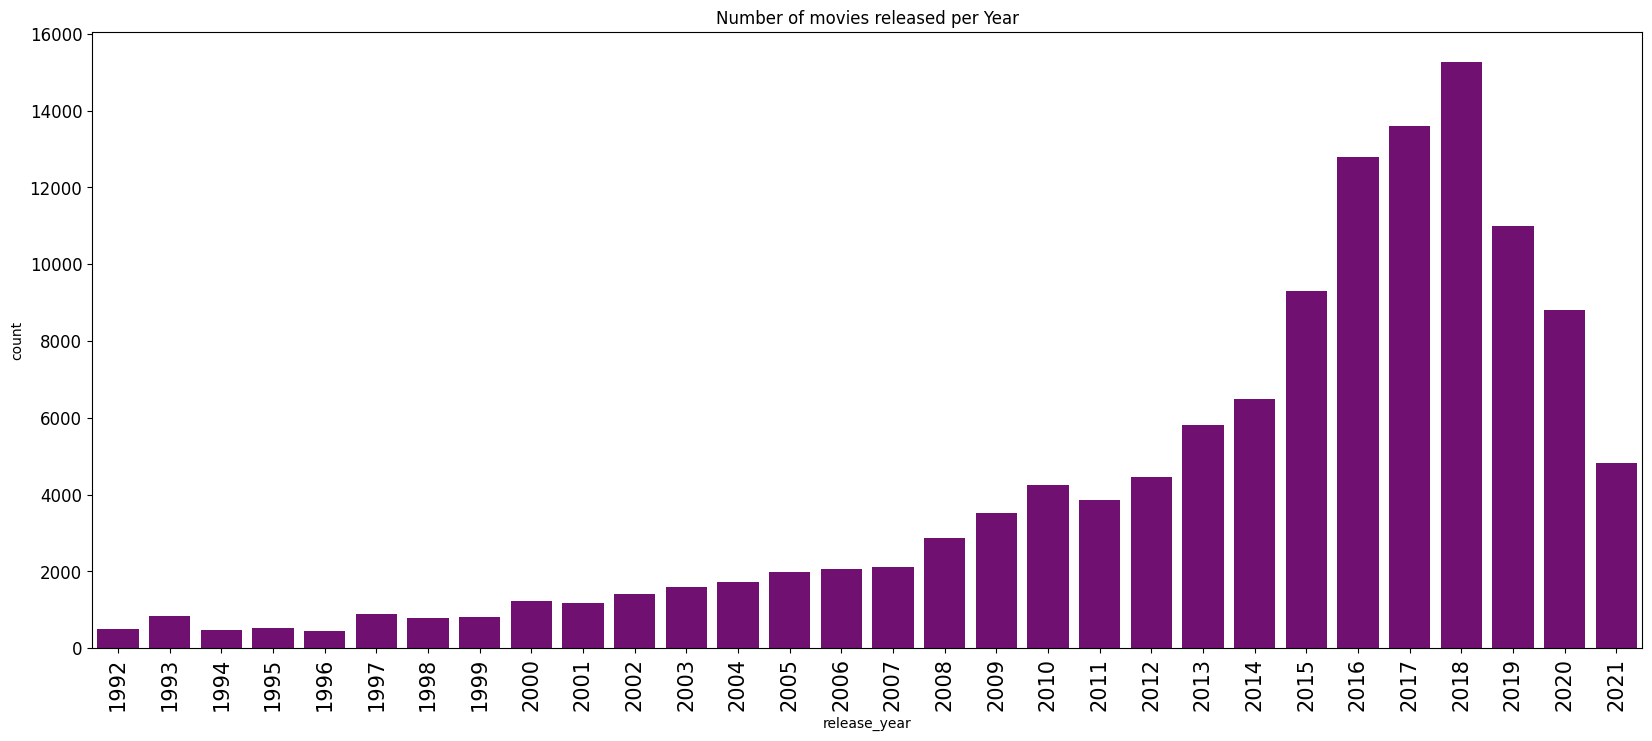

In [ ]:
plt.figure(figsize=(20,8))
df_year = M.loc[M['release_year']>1991]
sns.countplot(x='release_year', data = df_year,color='purple')
plt.title("Number of movies released per Year")
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=12)
plt.show()

*   Since,last 30 years the count of movies produced in a year is gradually increasing.

**Type of movies/TV show's content available on Netflix**

*   **PG-13**:Parental Guidance with Adult Themes[Parental Guidance]
*   **TV-MA**:Mature Audience[Only for Adults]
*   **PG**:Parental Guidance without Adult Themes[Parental Guidance]
*   **TV-14**:Contents with Parents strongly cautioned.
*   **TV-PG**:Parental guide suggested[Parental Guidance]
*   **TV-Y**:Children suited content[General Audience & Kids]
*   **TV-Y7**:Children of age 7 and older[General Audience & Kids]
*   **R**:Strictly for Adults[Only for Adults]
*   **TV-G**:Suitable for all audiences[General Audience & Kids]
*   **G**:General Audience films[General Audience & Kids]
*   **NC-17**:No one seventeen and under admitted[Only for Adults]
*   **NR**:Not rated movies[Not Rated]
*   **TV-Y7-FV**:Children of age 7 and older with fantasy violence[General Audience & Kids]
*   **UR**:recut version of rated movie[Not Rated]

In [ ]:
M['rating'].value_counts().sort_index(ascending=False)

,count
rating,
Unknown Rating,12
UR,86
TV-Y7-FV,62
TV-Y7,1974
TV-Y,1372
TV-PG,9221
TV-MA,39294
TV-G,1609
TV-14,27455


*   Most of the movies uploaded in netflix are "Adult Content".

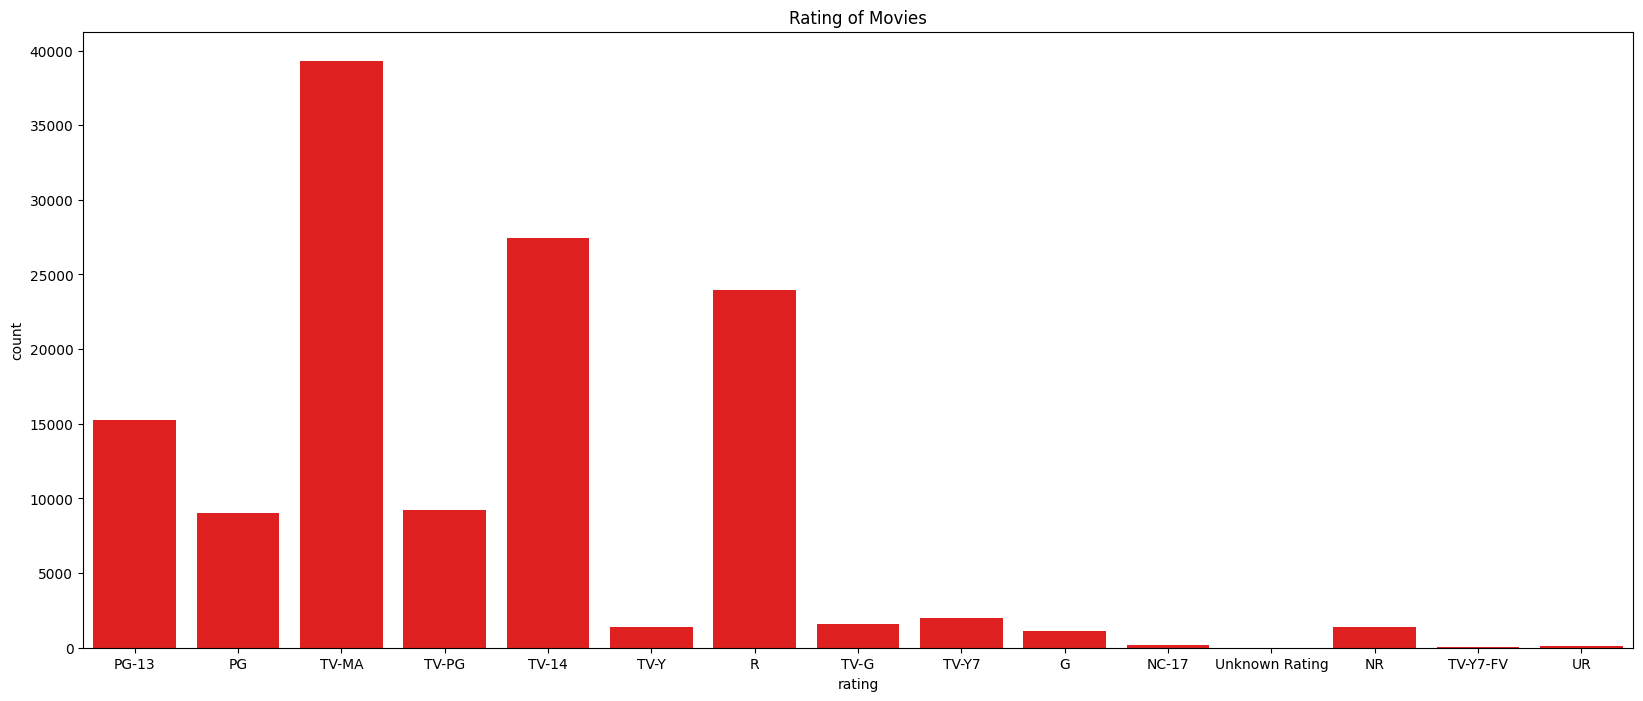

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x ="rating" , data = M , color='red')
plt.title("Rating of Movies")
plt.show()

In [ ]:
T['rating'].value_counts().sort_index(ascending=False)

,count
rating,
Unknown Rating,58
TV-Y7,3762
TV-Y,1712
TV-PG,4311
TV-MA,27627
TV-G,1002
TV-14,14122
R,54
NR,83


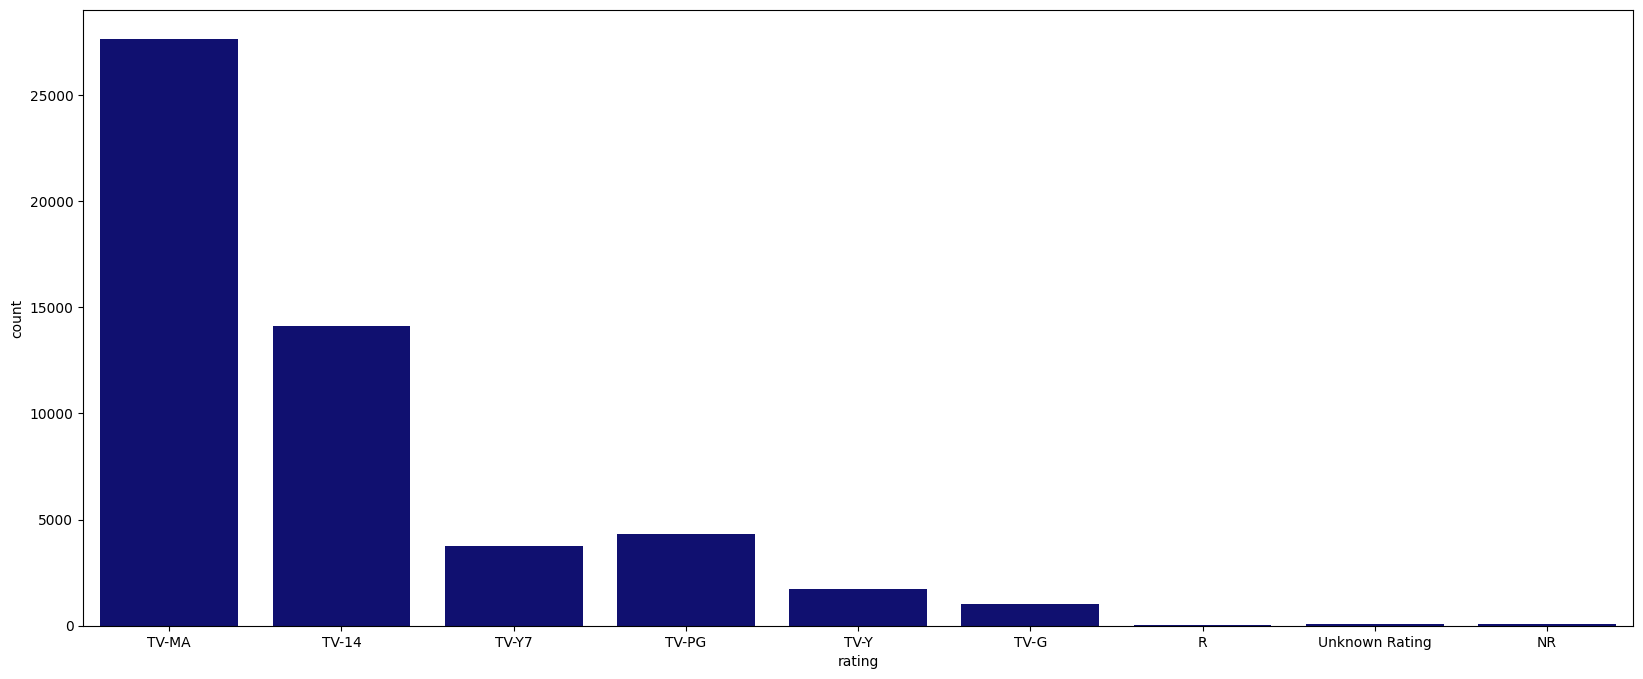

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x ="rating" , data = T , color='navy')
plt.show()

*   Most of the TV Show's uploaded in netflix are "Adult Content".

**Type of content is available in different countries**

In [ ]:
T.groupby('country')['rating'].value_counts()

country          rating
                 TV-MA       8
 Australia       TV-MA      57
                 TV-Y7      35
                 TV-14      20
                 TV-Y       15
                          ... 
Unknown Country  TV-Y7     465
                 TV-Y      210
                 TV-G       62
                 R           9
Uruguay          TV-G        3
Name: count, Length: 276, dtype: int64

*   Most of the content available for different countries is "Adult content".

**Does Netflix has more focus on TV Shows than movies in recent years?**

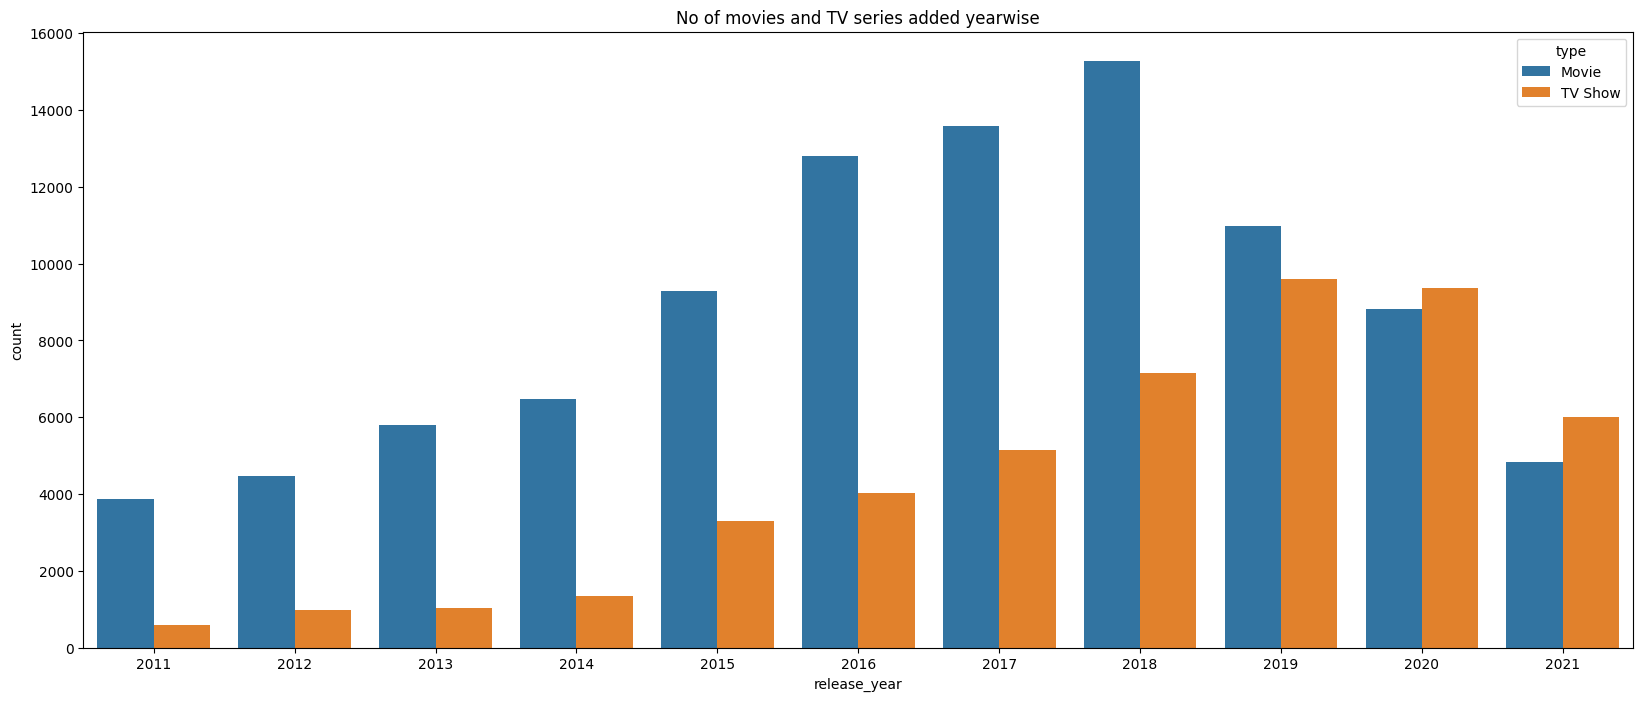

In [ ]:
plt.figure(figsize=(20,8))
df_year = N.loc[N['release_year']>2010]
sns.countplot(x='release_year', data = df_year, hue='type')
plt.title("No of movies and TV series added yearwise")
plt.show()

*   In the recent years Netflix is more focused on TV Shows compared to the Movies.
*   The number of TV Shows released are more compared to movies for the past 10 years.

# **Business Insights**

*   Most of the streaming video present in Netflix are movies.
*   Most of the streaming movies and tv shows present in netflix are "TV-MA" rated.
*   Most of the TV Show's and movies uploaded in netflix are "Adult Content".
*   Most video's content present in netflix are Dramas_International Movies,Documentaries,Stand-Up Comedy.
*   United States is the country that produces most of the movies and TV Show's.
*   "Friday" is the best day to release a movie and tv show on Netflix.
*   Every month is best to release a TV Show and movie on Netflix except "February".
*   Movie takes more time compared to Tv show to get into Netflix.
*   Since,last 30 years the count of movies produced in a year is gradually increasing.
*   In the recent years Netflix is more focused on TV Shows compared to the Movies.

# **Recommendations**

1.   Netflix must focus on producing more number of TV shows compared to movies.
2.   Netflix must decrease adding more number of movies and tv shows which are "Adult Content".
1.   Netflix must add the released movie's and tv show's as soon as possible.
2.   Netflix must produce the movies and tv shows in countries other than "United States".



